In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
file = "../Resources/police_reports_clean.csv"

police_reports = pd.read_csv(file)

In [3]:
# droppping non-regression related columns
incident_reports = police_reports.drop(columns=["Filed Online", "Police District", "Report Type Description", 
                                                "Incident Description", "Incident Subcategory", "Incident Day of Week", 
                                               "Resolution", "Intersection"])
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23


In [4]:
# extracting only the year and month from the date columns
def extract_year_month(date_str):
    return "-".join(date_str.split("-")[:2])
incident_reports["Incident Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports["Report Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,2020-01,2020-01


In [5]:
incident_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Datetime      411298 non-null  object 
 1   Incident Date          411298 non-null  object 
 2   Incident Year          411298 non-null  int64  
 3   Report Datetime        411298 non-null  object 
 4   Incident Category      411298 non-null  object 
 5   Analysis Neighborhood  411298 non-null  object 
 6   Latitude               411298 non-null  float64
 7   Longitude              411298 non-null  float64
 8   Incident Time          411298 non-null  object 
 9   Report Time            411298 non-null  object 
 10  Report Date            411298 non-null  object 
 11  Incident Year-Month    411298 non-null  object 
 12  Report Year-Month      411298 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 40.8+ MB


In [25]:
year_month_groupby = incident_reports.groupby(incident_reports['Incident Year-Month']).count()['Incident Datetime']
year_month_groupby = pd.DataFrame(year_month_groupby)
year_month_groupby.columns = ['Incident Count']
year_month_groupby

,Incident Count
Incident Year-Month,
2018-01,7374
2018-02,6636
2018-03,7118
2018-04,7187
2018-05,7387
2018-06,7206
2018-07,7888
2018-08,7912
2018-09,7435


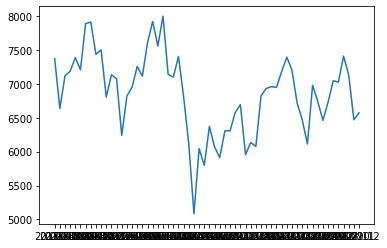

In [7]:
plt.plot(year_month_groupby['Incident Count'])
plt.show()
# change figsize
# change axis
# change xticks

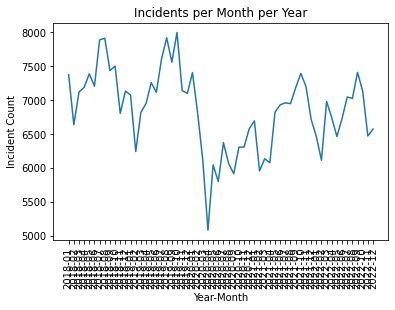

In [8]:
# shows the number of incidents per month per year (includes all incident types)
fig, ax = plt.subplots()
ax.plot(year_month_groupby['Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents per Month per Year')
plt.xticks(rotation=90)
plt.show()

In [9]:
# making dataframes based on type of crime
violent_crimes = ["Assult", "Larceny Theft", "Burglary", "Motor Vehicle Theft", "Robbery",
                  "Weapons Offense", "Arson", "Rape", "Homicide",
                  "Human Trafficking"]

nonviolent_crimes = ["Malicious Mischeif", "Other Miscellaneous", "Fraud", "Drug Offense",
                     "Disorderly Conduct", "Offences Against The Family And Children",
                     "Traffic Violation Arrest", "Weapons Carrying Etc",
                     "Stolen Property", "Forgery and Counterfeiting", "Traffic Collision",
                     "Vandalism", "Prostitution", "Embezzlement", "Civil Sidewalks",
                     "Sex Offense", "Drug Violation", "Malicious Mischief", "Gambling"]

misc_disturbance = ["Liquor Laws ", "Missing Person", "Suspicious Activity", "Miscellaneous Investigation",
        "Other Offenses", "Courtesy Report", "Fire Report", "Vehicle Impounded", "Suicide"]

get_rid_of = ["Non-Criminal", "Recovered Vehicles", "Lost Property", "Warrant", "Other", 
              "Case Closure", "Vehicle Misplaced"]


violent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(violent_crimes)]
nonviolent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(nonviolent_crimes)]
misc_disturbance_df = incident_reports.loc[incident_reports["Incident Category"].isin(misc_disturbance)]

In [10]:
# violent crimes per month per year
violent_crime_groupby = violent_crimes_df.groupby(violent_crimes_df['Incident Year-Month']).count()['Incident Datetime']
violent_crime_groupby = pd.DataFrame(violent_crime_groupby)
violent_crime_groupby.columns = ['Crime Count']
violent_crime_groupby.head()

,Crime Count
Incident Year-Month,
2018-01,3105
2018-02,2598
2018-03,2785
2018-04,2765
2018-05,3065


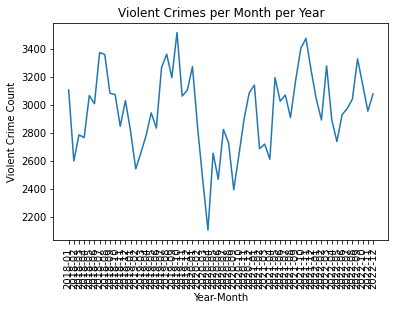

In [11]:
# violent crimes plot
fig, ax = plt.subplots()
ax.plot(violent_crime_groupby['Crime Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Violent Crime Count')
ax.set_title('Violent Crimes per Month per Year')
plt.xticks(rotation=90)
plt.show()

In [12]:
# nonviolent crimes per month per year
nonviolent_groupby = nonviolent_crimes_df.groupby(nonviolent_crimes_df['Incident Year-Month']).count()['Incident Datetime']
nonviolent_groupby = pd.DataFrame(nonviolent_groupby)
nonviolent_groupby.columns = ['Crime Count']
nonviolent_groupby.head()

,Crime Count
Incident Year-Month,
2018-01,1907
2018-02,1756
2018-03,1924
2018-04,1953
2018-05,1893


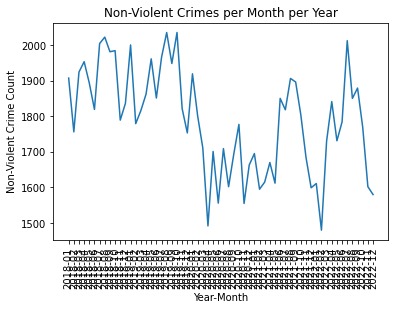

In [13]:
# nonviolent crimes plot
fig, ax = plt.subplots()
ax.plot(nonviolent_groupby['Crime Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Non-Violent Crime Count')
ax.set_title('Non-Violent Crimes per Month per Year')
plt.xticks(rotation=90)
plt.show()

In [14]:
misc_incidents_groupby = misc_disturbance_df.groupby(misc_disturbance_df['Incident Year-Month']).count()['Incident Datetime']
misc_incidents_groupby = pd.DataFrame(misc_incidents_groupby)
misc_incidents_groupby.columns = ['Misc. Incident Count']
misc_incidents_groupby.head()

,Misc. Incident Count
Incident Year-Month,
2018-01,632
2018-02,655
2018-03,644
2018-04,632
2018-05,651


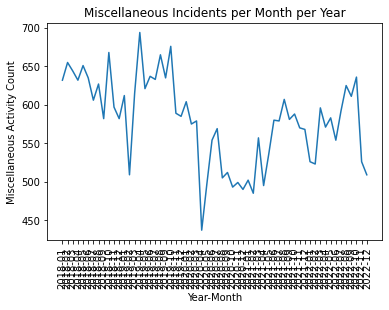

In [15]:
fig, ax = plt.subplots()
ax.plot(misc_incidents_groupby['Misc. Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Miscellaneous Activity Count')
ax.set_title('Miscellaneous Incidents per Month per Year')
plt.xticks(rotation=90)
plt.show()

Grouping and Graphing By Date and Neighborhood

In [16]:
incident_reports.dtypes

Incident Datetime         object
Incident Date             object
Incident Year              int64
Report Datetime           object
Incident Category         object
Analysis Neighborhood     object
Latitude                 float64
Longitude                float64
Incident Time             object
Report Time               object
Report Date               object
Incident Year-Month       object
Report Year-Month         object
dtype: object

In [17]:
incident_dtypes = incident_reports.astype({'Analysis Neighborhood': str})
incident_dtypes = incident_reports.astype({'Incident Year-Month': str})

In [18]:
incident_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Datetime      411298 non-null  object 
 1   Incident Date          411298 non-null  object 
 2   Incident Year          411298 non-null  int64  
 3   Report Datetime        411298 non-null  object 
 4   Incident Category      411298 non-null  object 
 5   Analysis Neighborhood  411298 non-null  object 
 6   Latitude               411298 non-null  float64
 7   Longitude              411298 non-null  float64
 8   Incident Time          411298 non-null  object 
 9   Report Time            411298 non-null  object 
 10  Report Date            411298 non-null  object 
 11  Incident Year-Month    411298 non-null  object 
 12  Report Year-Month      411298 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 40.8+ MB


In [19]:
neighborhood_all_groupby = incident_dtypes.groupby(['Incident Year-Month', 'Analysis Neighborhood']).count()['Incident Datetime']
neighborhood_all_groupby = pd.DataFrame(neighborhood_all_groupby)
neighborhood_all_groupby.columns = ['Incident Count']
neighborhood_all_groupby

Incident Count
Incident Year-Month Analysis Neighborhood                
2018-01             Bayview Hunters Point             476
                    Bernal Heights                    163
                    Castro/Upper Market               210
                    Chinatown                         196
                    Excelsior                         162
...                                                   ...
2022-12             Treasure Island                    25
                    Twin Peaks                         25
                    Visitacion Valley                  96
                    West of Twin Peaks                114
                    Western Addition                  207

[2460 rows x 1 columns]

/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


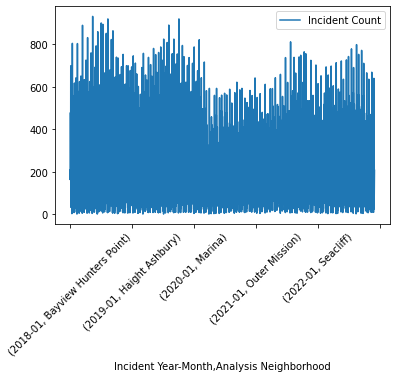

In [20]:
# crime count by year-month and neighborhood
neighborhood_all_groupby.plot()
# ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Crime Count by Date and Neighborhood')
ax.set_xticklabels('Analysis Neighborhood')
plt.xticks(rotation=45)
plt.show()

In [21]:
# neighborhood = pd.Categorical 

neighborhood_groupby = pd.pivot_table(data=incident_dtypes, index=incident_dtypes['Analysis Neighborhood'],
                                         columns=incident_dtypes['Incident Year-Month'], values=['Incident Datetime'], 
                                     aggfunc='count')
neighborhood_groupby

# dfp = pd.pivot_table(data=df, index=df.date.dt.year, columns='months', values='value')


Incident Datetime                          \
Incident Year-Month                      2018-01 2018-02 2018-03 2018-04   
Analysis Neighborhood                                                      
Bayview Hunters Point                        476     397     420     460   
Bernal Heights                               163     111     127     137   
Castro/Upper Market                          210     165     230     214   
Chinatown                                    196     176     127     151   
Excelsior                                    162     166     154     130   
Financial District/South Beach               699     642     651     726   
Glen Park                                     33      30      32      51   
Golden Gate Park                              88      57      54      59   
Haight Ashbury                               108     110      95     108   
Hayes Valley                                 194     122     131     179   
Inner Richmond                                99      98      93     115   
Inner Sunset                                  95      83      91      82   
Japantown                                     77      42      75      57   
Lakeshore                                    101      94     115      82   
Lincoln Park                                   3       1       6       5   
Lone Mountain/USF                            102      91     111     119   
Marina                                       147     147     175     133   
McLaren Park                                   6       6       6      11   
Mission                                      805     804     890     832   
Mission Bay                                  138     100     141     133   
Nob Hill                                     214     177     193     219   
Noe Valley                                    81      65      57      74   
North Beach                                  228     213     234     213   
Oceanview/Merced/Ingleside                   121      70     105      95   
Outer Mission                                120     110      95      95   
Outer Richmond                               169     125     149     155   
Pacific Heights                              129      85      97     103   
Portola                                      110      66      91      82   
Potrero Hill                                 114     100     105     111   
Presidio                                      16      11      26      14   
Presidio Heights                              45      53      36      39   
Russian Hill                                 186     158     158     167   
Seacliff                                       8       5       9       6   
South of Market                              559     579     634     578   
Sunset/Parkside                              219     280     289     292   
Tenderloin                                   618     625     589     625   
Treasure Island                               10      28      35      41   
Twin Peaks                                    33      12      24      18   
Visitacion Valley                             99      95     110     104   
West of Twin Peaks                           168     149     143     178   
Western Addition                             225     188     215     194   

                                                                        \
Incident Year-Month            2018-05 2018-06 2018-07 2018-08 2018-09   
Analysis Neighborhood                                                    
Bayview Hunters Point              444     442     461     445     448   
Bernal Heights                     149     124     163     144     117   
Castro/Upper Market                252     256     237     260     212   
Chinatown                          160     183     183     170     195   
Excelsior                          126     127     163     163     122   
Financial District/South Beach     760     793     901     852     823   
Glen Park           

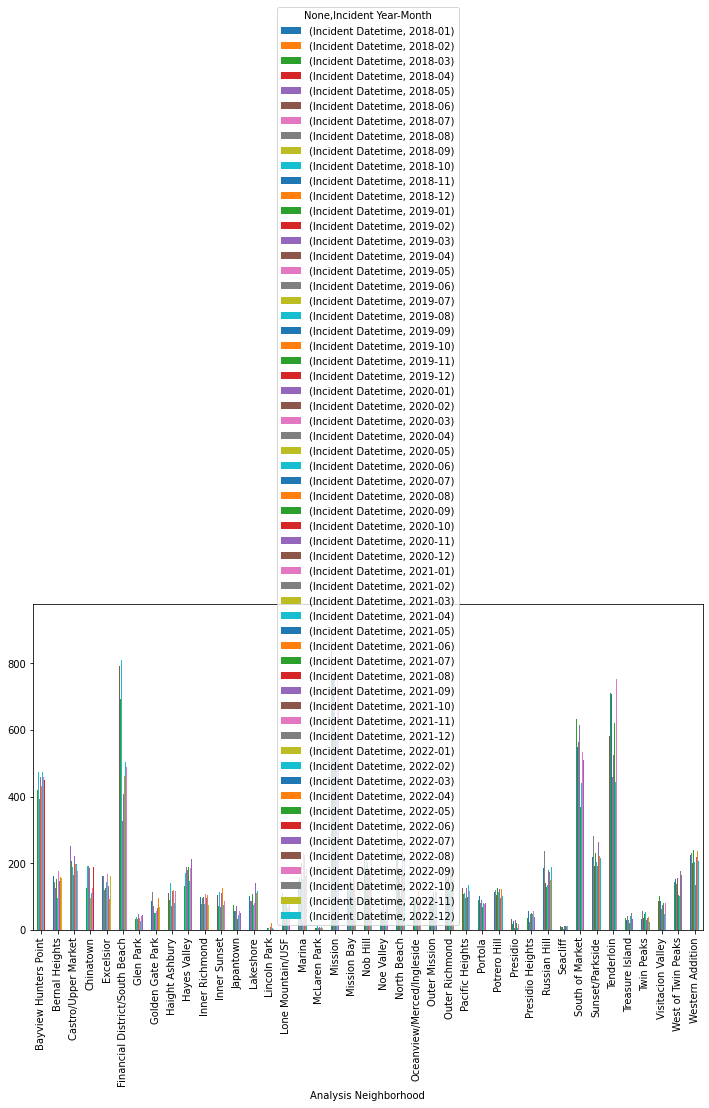

In [22]:
neighborhood_groupby.plot(kind='bar', figsize=(12, 6))
# ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()
# may need to do subplots by year

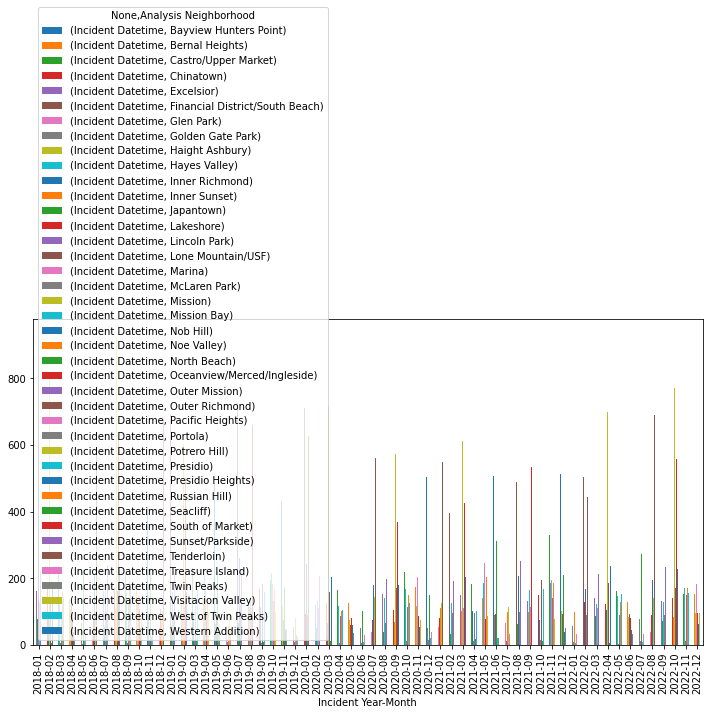

In [23]:
neighborhood_groupby2 = pd.pivot_table(data=incident_dtypes, index=incident_dtypes['Incident Year-Month'],
                                         columns=incident_dtypes['Analysis Neighborhood'], values=['Incident Datetime'], 
                                     aggfunc='count')
# neighborhood_groupby2
neighborhood_groupby2.plot(kind='bar', figsize=(12, 6))
plt.show()

In [24]:
# repeat for crime categories